# Details for hyperspectral settings in `GMOdetector` workflow

### Fluorescent protein settings

#### Computing weights of fluorescent components

Below should be all known fluorescent components contained in the sample. This includes each fluorescent protein, as well as a "noise" or "diffraction" term if applicable. All of these components must exist in the user's spectral library. `GMOdetector` currently comes with a spectral library that includes, by default:
- DsRed
- ZsYellow
- GFP
- Chl
- ChlA
- ChlB
- Noise

In [8]:
fluorophores=(DsRed Chl Noise) # An explanation of array variables in bash is here: https://tldp.org/LDP/Bash-Beginners-Guide/html/sect_10_02.html

The `desired_wavelength_range` array variable limits hyperspectral analysis to wavelengths within a specific range.
- This range should cover all fluorophores provided in the `fluorophores` array variable able.
- Aside from runtime, there is no disadvantage to including a wider range than is needed.

In [9]:
desired_wavelength_range=(500 900)

#### Producing false color plots to show fluorescent components

To assist user inspection of regression results, false color plots are produced by `GMOdetector` to show results of regression over whole samples.<br><br> The `FalseColor_channels` parameter should be a list of which channels are desired for 1) red, 2) blue, and 3) green channels.

In [10]:
FalseColor_channels=(Chl DsRed Diffraction)

The `FalseColor_caps` array variable indicates an upper limit of signal for each of these component.
- Any signal at or above these values will appear with maximum brightness; thus, these variables are comparable to exposure on a camera.
- If caps are too high, not much signal at lower ranges will be seen.
- If cap for a given component is too low, the false color images will appear overexposed with respect to the component. For examples of how this parameter affects outputs, see the [relevant notebook](https://github.com/naglemi/GMOnotebook/blob/master/1_Decide_parameters/3_Other_parameters/1_false-color_cap_examples.ipynb) for examples.

In [11]:
FalseColor_caps=(200 400 200)

`GMOlabeler` will use the below parameters to classify individual explants on plates as positive for a given fluorescent protein or not.
- This is to be used for statistics in the `GMOlabeler` module and is independent of the `FalseColor` parameters set above, which are only used for `CubeGLM` plots.
- Multiple can be used to generate the final plots summarizing results. The user has the option of including chlorophyll (Chl) to produce statistics of chlorophyll signals.

#### Computing summary statistics for fluorescent components

In [12]:
reporters=(DsRed)

Parameters for reporter signal threshold and pixel threshold must be provided by the user. Our grid search yielded several noted below. These were most recently calculated from statistics produced with Python `GMOdetector`.
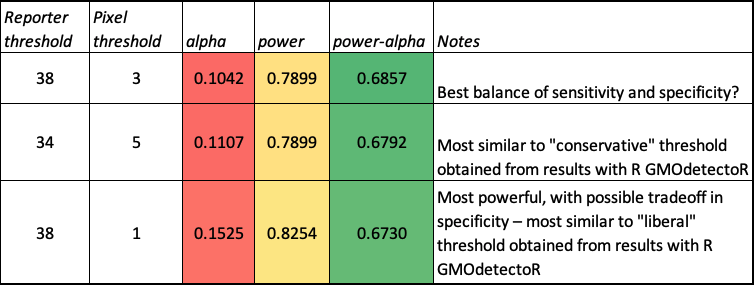

In [13]:
reporter_threshold=38
pixel_threshold=3